# Projektarbeit 1 - Nichtlinearer Model-Fit
## Mathematische Modellbildung und Simulation komplexer Systeme
### Barvenko Irina (IC), Heim Stefan (IC), Nowak Maximilian (DC), Vogel Luisa (DC)
### Arbeitsgruppe 02, SoSe23, 09.05.2023

### 1.1 Initiale Datenanalyse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize, curve_fit
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.7.1
numpy       1.23.5
pandas      1.5.3
scipy       1.10.1
seaborn     0.12.2
sinfo       0.3.4
sklearn     1.2.2
-----
IPython             8.12.0
jupyter_client      8.1.0
jupyter_core        5.3.0
jupyterlab          3.5.3
notebook            6.5.4
-----
Python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
8 logical CPU cores, Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
-----
Session information updated a

#### Einlesen der 5 Messreihen

In [2]:
ex01 = np.loadtxt("data_1_3/experiment_01.txt", dtype="f8")
x1 = (ex01[:, 0])
y1 = (ex01[:, 1])
z1 = (ex01[:, 2])
ex02 = np.loadtxt("data_1_3/experiment_02.txt", dtype="f8")
x2 = (ex02[:, 0])
y2 = (ex02[:, 1])
z2 = (ex02[:, 2])
ex03 = np.loadtxt("data_1_3/experiment_03.txt", dtype="f8")
x3 = (ex03[:, 0])
y3 = (ex03[:, 1])
z3 = (ex03[:, 2])
ex04 = np.loadtxt("data_1_3/experiment_04.txt", dtype="f8")
x4 = (ex04[:, 0])
y4 = (ex04[:, 1])
z4 = (ex04[:, 2])
ex05 = np.loadtxt("data_1_3/experiment_05.txt", dtype="f8")
x5 = (ex05[:, 0])
y5 = (ex05[:, 1])
z5 = (ex05[:, 2])

#### Visiualisierung der Daten

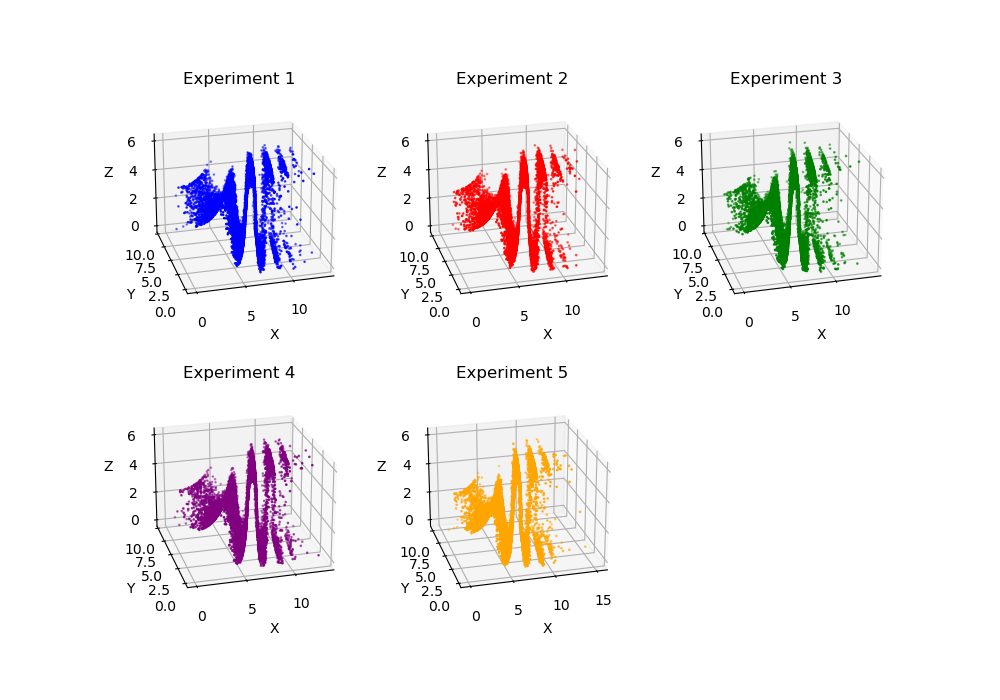

In [3]:
%matplotlib widget

colors = ['blue', 'red', 'green', 'purple', 'orange']

fig = plt.figure(figsize=(10, 7))

for i, ex in enumerate([ex01, ex02, ex03, ex04, ex05]):
    x = ex[:, 0]
    y = ex[:, 1]
    z = ex[:, 2]
    ax = fig.add_subplot(2,3,i+1, projection='3d')
    ax.set_title("Experiment " + str(i+1))
    ax.scatter(x, y, z, c=colors[i], s=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=23, azim=-105)
    
plt.show()

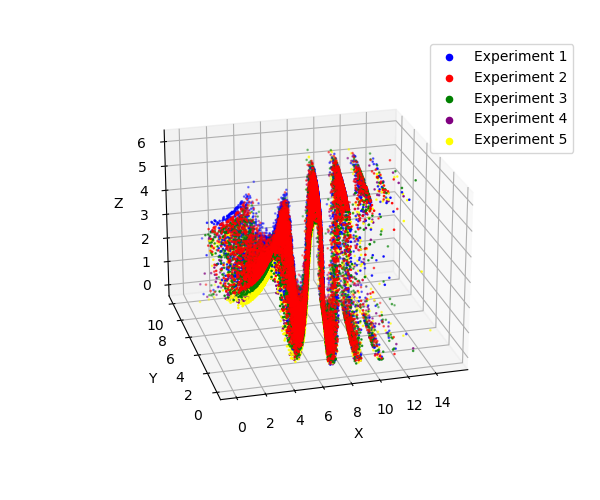

In [4]:
%matplotlib widget

colors = ['blue', 'red', 'green', 'purple', 'yellow']
experiments = []


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

for i, ex in enumerate([ex01, ex02, ex03, ex04, ex05]):
    x = ex[:, 0]
    y = ex[:, 1]
    z = ex[:, 2]

    ax.scatter(x, y, z, c=colors[i], label=f"Experiment {i + 1}", s=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=23, azim=-105)
ax.legend(loc='center left', bbox_to_anchor=(0.8, 0.9), markerscale=5)
plt.show()

#### Vorschläge für Modell-Funktion

##### 1. Versuch: Polynom 3. Grades:

C:\Users\maxim\AppData\Local\Temp\ipykernel_14532\4278617456.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


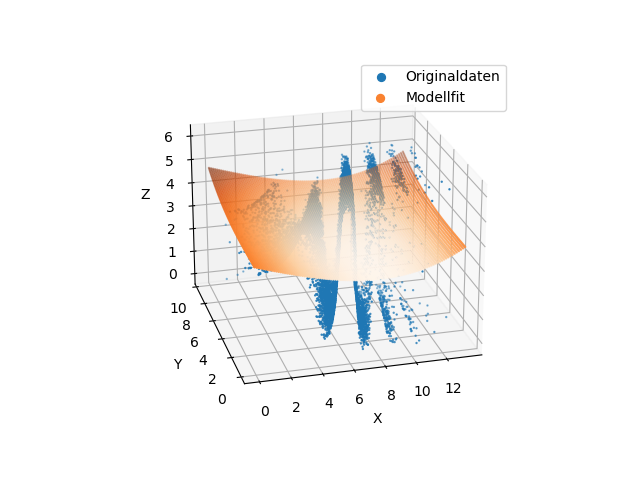

In [24]:
%matplotlib widget
 
# define model function
def model(x, a0, a1, a2, a3):
    return a0 + a1 * x[:,0] + a2 * x[:,1] + a3 * (x[:,0] ** 3 + x[:,1] ** 3)

# initial values
a0_init = 1.0
a1_init = 1.0
a2_init = 1.0
a3_init = 1.0
p0 = [a0_init, a1_init, a2_init, a3_init]

# perform parameter optimization
params, _ = curve_fit(model, ex01[:, 0:2], z1, p0=p0)
a0, a1, a2, a3 = params

x = np.linspace(min(ex01[:, 0]), max(ex01[:, 0]), 100)
y = np.linspace(min(ex01[:, 1]), max(ex01[:, 1]), 100)
X, Y = np.meshgrid(x, y)


zz =  a0 + a1 * X + a2 * Y + a3 * (X ** 3 + Y ** 3)  # z for surface plot
# z =  a0 + a1 * ex01[:, 0] + a2 * ex01[:, 1] + a3 * (ex01[:, 0] ** 3 + ex01[:, 1] ** 3)  # z for scatter plot


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(ex01[:, 0], ex01[:, 1], ex01[:, 2], s=0.5, label="Originaldaten")
# ax.scatter(ex01[:, 0], ex01[:, 1], z, s=0.5, label="Modelfit")
ax.scatter3D(X, Y, zz, c=zz, cmap='Oranges', s=0.5, label="Modellfit")
ax.view_init(23, -105)
ax.legend(markerscale=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show() 

##### 2. Versuch: Polynom 12. Grades

In [6]:
# determine polynomm coefficient by linear regression

x = (ex01[:, 0])[0::5]
y = (ex01[:, 1])[0::5]
z = (ex01[:, 2])[0::5]

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
z = z.reshape((len(z), 1))

theta = -2*np.pi/18
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
xyz = np.concatenate((x,y,z), axis=1)
xyz_rotated = xyz @ rotation_matrix

xyz_filtered = np.array([[x,y,z] for x,y,z in xyz_rotated if x > 0 and x < 9])

x = xyz_filtered[:, 0]
x = x.reshape((len(x), 1))
y = xyz_filtered[:, 1]
y = y.reshape((len(y), 1))
z = xyz_filtered[:, 2]
z = z.reshape((len(z), 1))

poly_features = PolynomialFeatures(degree=12, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, z)

print("polynom coefficients: " + str(poly_reg.coef_))
print("polynom y-intercept: " + str(poly_reg.intercept_))

polynom coefficients: [[ 1.70190379e+02 -6.19213281e+02  1.08315624e+03 -1.07390300e+03
   6.59111084e+02 -2.63359520e+02  7.03421348e+01 -1.26480159e+01
   1.51041507e+00 -1.14770667e-01  5.02010409e-03 -9.61831770e-05]]
polynom y-intercept: [-11.90049693]


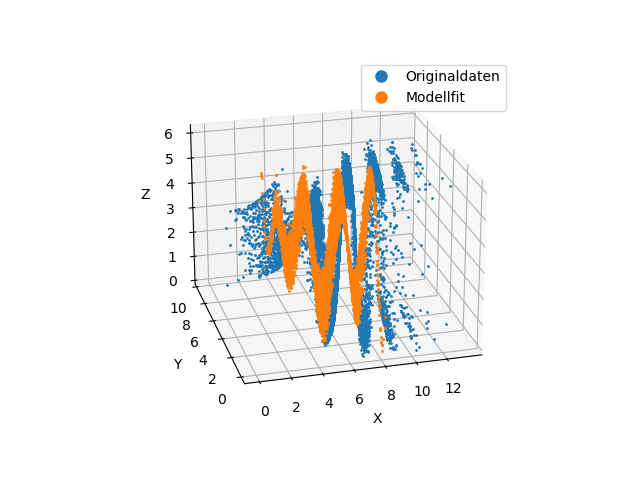

In [27]:
%matplotlib widget
x = x1[::]
y = y1[::]
z = z1[::]

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
z = z.reshape((len(z), 1))

# pre-filter data for polynom fit to span from 2.5 and 8.5
xyz = np.concatenate((x,y,z), axis=1)
xyz_filtered = np.array([[x,y,z] for x,y,z in xyz if x > 2.5 and x < 8.5])
x = xyz_filtered[:, 0]
y = xyz_filtered[:, 1]
z = xyz_filtered[:, 2]

#plot data and polynom fit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, '.', markersize=2, label="Originaldaten")
ax.plot(x, y, 1.70201420e+02*(x-y/3)**1 -6.19293987e+02*(x-y/3)**2 +1.08332362e+03*(x-y/3)**3 -1.07408170e+03*(x-y/3)**4 +6.59225127e+02*(x-y/3)**5 \
            -2.63405980e+02*(x-y/3)**6  +7.03546305e+01*(x-y/3)**7 -1.26502606e+01*(x-y/3)**8 +1.51068161e+00*(x-y/3)**9 -1.14790748e-01*(x-y/3)**10 \
            +5.02097366e-03*(x-y/3)**11 -9.61996606e-05*(x-y/3)**12 -11.904180115968504, '.', markersize=2, label="Modellfit")
ax.view_init(23, -105)
ax.legend(markerscale=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


##### 3. Versuch: Optische Nachbildung der beobachteten Daten

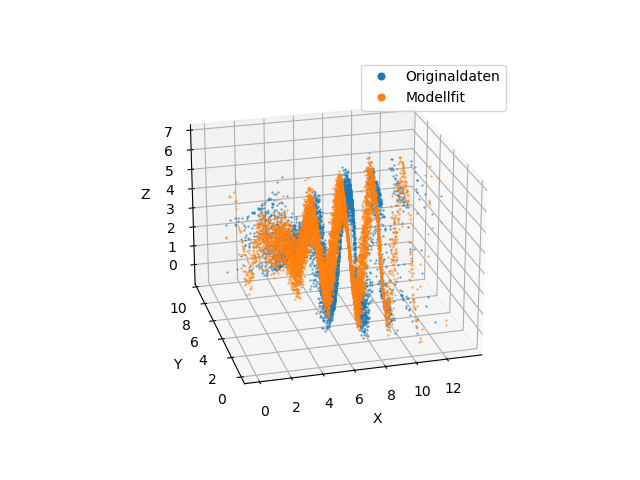

In [25]:
%matplotlib widget
x = x1[::]
y = y1[::]
z = z1[::]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1[::2], y1[::2], z1[::2], '.', markersize=0.8, label="Originaldaten")
ax.plot(x, y, (5-6*np.exp(-0.15*(x-y/3))) *np.sin((x-y/3)*np.pi-3.2) + 3.2, '.', markersize=0.8, label="Modellfit")
ax.view_init(23, -105)
ax.legend(markerscale=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#### Erkenntnisse durch Boxplots

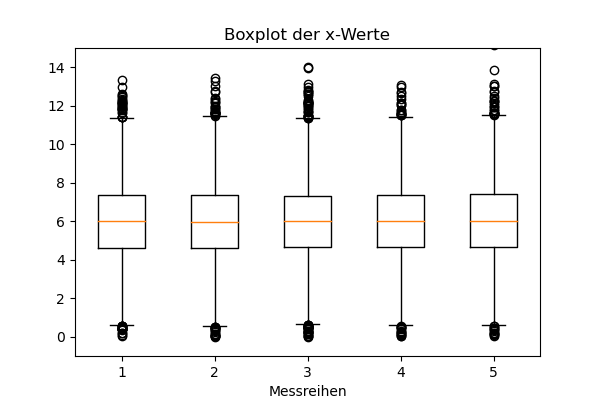

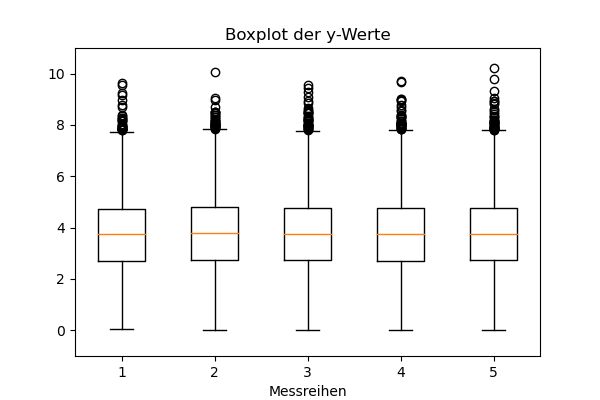

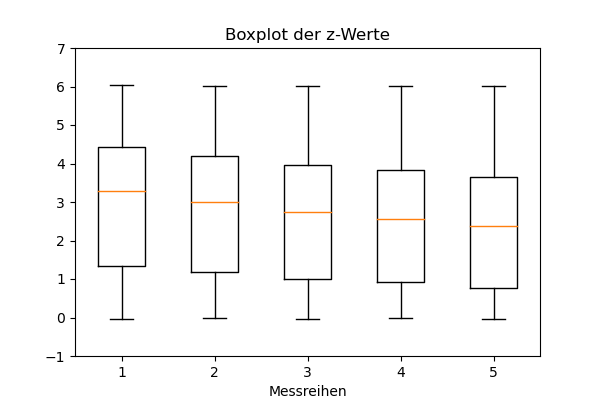

In [16]:

for name, data, ylims in [('x', [x1,x2,x3,x4,x5], [-1, 15]), ('y', [y1,y2,y3,y4,y5], [-1, 11]), ('z', [z1,z2,z3,z4,z5], [-1, 7])]:
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    axs.boxplot(data)
    
    axs.set_title('Boxplot der ' + name + '-Werte')
    axs.set_ylim(ylims)
    axs.set_xlabel('Messreihen')
    axs.set_xticklabels(['1', '2', '3', '4', '5'])

    plt.show()


#### Auswertung der Verteilung der (x,y)-Wertepaare

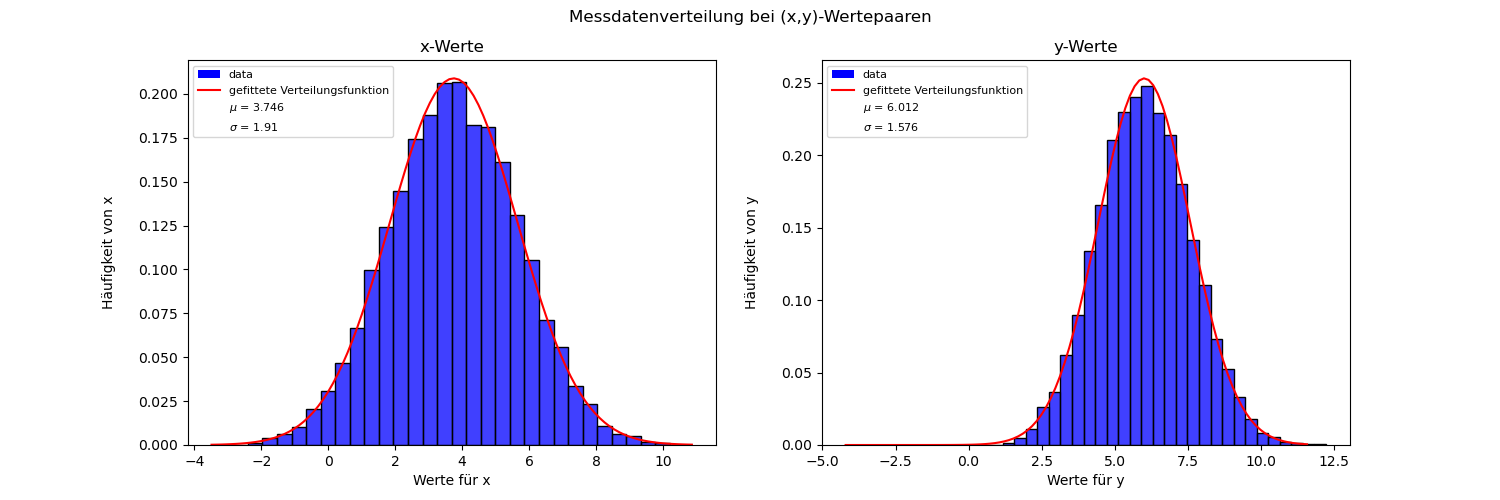

In [17]:
x = (ex02[:, 0])
y = (ex02[:, 1])
z = (ex02[:, 2])

# rotate oscillations in the data parallel to y axis
def preprocess(x, y, z):
    x = x.reshape((len(x), 1))
    y = y.reshape((len(y), 1))
    z = z.reshape((len(z), 1))

    theta = -2 * np.pi / 14
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
    xyz = np.concatenate((x, y, z), axis=1)
    xyz_rotated = xyz @ rotation_matrix

    x = xyz_rotated[:, 0]
    y = xyz_rotated[:, 1]
    z = xyz_rotated[:, 2]

    return x, y, z

x, y, z = preprocess(x, y, z)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Messdatenverteilung bei (x,y)-Wertepaaren")

# plot histogram + normal distribution of x values
ax[0].set_title('x-Werte')
his = sns.histplot(ax=ax[0], data=x, kde=False, bins=30, stat='density', label='data', color='blue', edgecolor='black')
xmin, xmax = his.get_xlim()
mean = np.mean(x)
sd = np.std(x)
rounded_mean = round(mean, 3)
rounded_sd = round(sd, 3)
x_pdf = np.linspace(xmin, xmax, 100)
y_pdf = norm.pdf(x_pdf, mean, sd)
ax[0].plot(x_pdf, y_pdf, 'r', label='gefittete Verteilungsfunktion')
ax[0].legend(handles=[
        Patch(facecolor='blue', label='data'),
        Line2D([0], [0], color='r', label='gefittete Verteilungsfunktion'),
        Line2D([], [], linestyle='none', label='$\mu$ = ' + str(rounded_mean)), 
        Line2D([], [], linestyle='none', label='$\sigma$ = ' + str(rounded_sd))
    ], fontsize=8, loc='upper left')
ax[0].set_xlabel('Werte für x')
ax[0].set_ylabel('Häufigkeit von x\n')

# plot histogram + normal distribution of y values
ax[1].set_title('y-Werte')
sns.histplot(ax=ax[1], data=y, kde=False, bins=30, stat='density', label='data', color='blue', edgecolor='black')
xmin, xmax = his.get_xlim()
mean = np.mean(y)
sd = np.std(y)
rounded_mean = round(mean, 3)
rounded_sd = round(sd, 3)
x_pdf = np.linspace(xmin, xmax, 100)
y_pdf = norm.pdf(x_pdf, mean, sd)
ax[1].plot(x_pdf, y_pdf, 'r', label='gefittete Verteilungsfunktion')
ax[1].legend(handles=[
    Patch(facecolor='blue', label='data'),
    Line2D([0], [0], color='r', label='gefittete Verteilungsfunktion'),
    Line2D([], [], linestyle='none', label='$\mu$ = ' + str(rounded_mean)),
    Line2D([], [], linestyle='none', label='$\sigma$ = ' + str(rounded_sd))
], fontsize=8, loc='upper left')
ax[1].set_xlabel('Werte für y')
ax[1].set_ylabel('Häufigkeit von y\n')

plt.show()

### 1.2 Theoretische und praktische Modellfindung

#### Finden der passenden Funktionen für $u_k(t)$ und $t_l(x,y)$ 

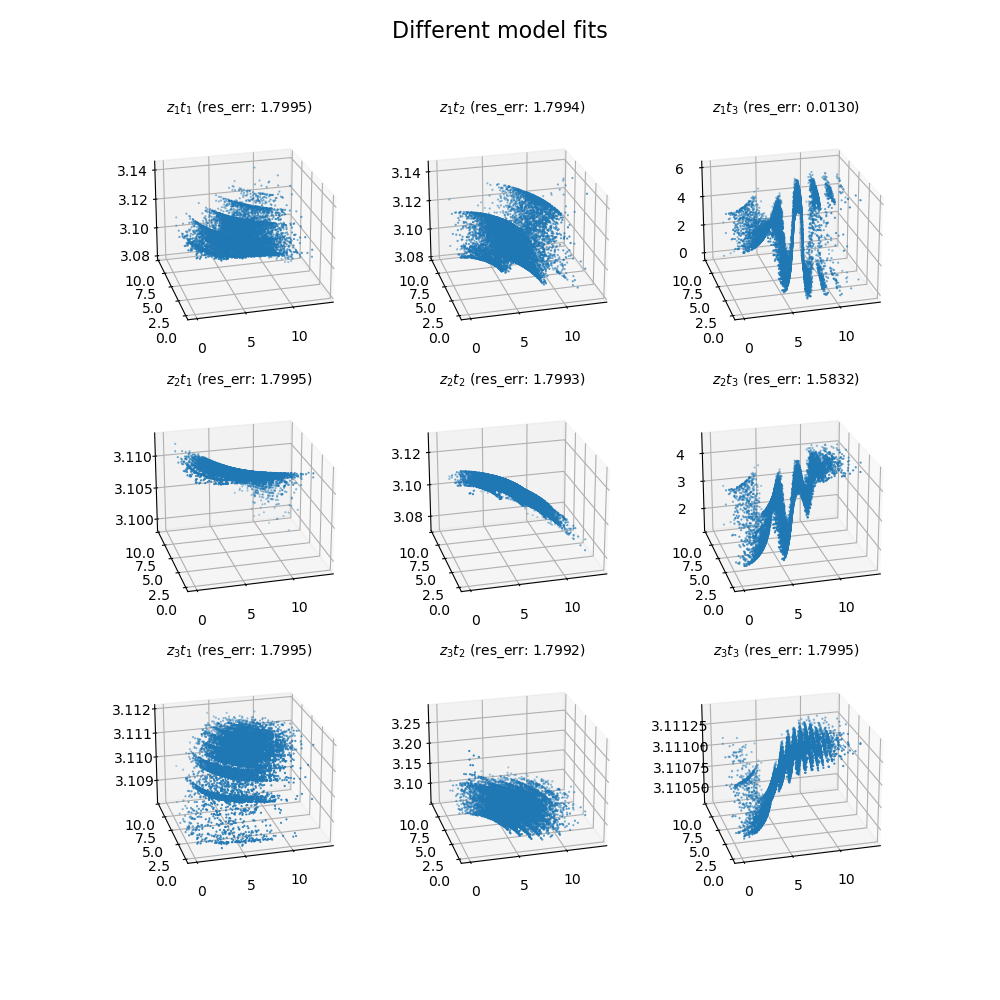

In [3]:
%matplotlib widget

# possible parameter ranges
gamma0 = np.linspace(0.2, 0.3, 11)[0]
N0 = np.linspace(6, 8, 3)[0]
beta0 = np.linspace(2.0, 2.5, 6)[0]

def z(U, N, gamma): return N / (np.exp(-gamma*N*U) + 1)
def Su1dt(t, beta, c): return ((np.sin(beta*t) - beta*t*np.cos(beta*t))/(beta**2)) + c 
def Su2dt(t, beta, c): return (t**2)/40 - (1/beta)*np.cos(beta*t) + c
def Su3dt(t, beta, c): return (10*np.exp(-beta*t/10) - np.cos(beta*t))/beta + c
def t1(x, y): return 0.3*np.abs(x*y)
def t2(x, y): return (x**2 + y**2)**(1/2)
def t3(x, y): return 0.5*np.abs(0.2*x**2 - y + 2)

def f_cost(x0, *args):
    gamma, N, beta, c1, c2, c3, c4, c5 = x0
    U, t = args
    return np.sum((z1 - z(U(t(x1, y1), beta, c1), N, gamma))**2) + \
        np.sum((z2 - z(U(t(x2, y2), beta, c2), N, gamma))**2) + \
        np.sum((z3 - z(U(t(x3, y3), beta, c3), N, gamma))**2) + \
        np.sum((z4 - z(U(t(x4, y4), beta, c4), N, gamma))**2) + \
        np.sum((z5 - z(U(t(x5, y5), beta, c5), N, gamma))**2)

x0 = (gamma0, N0, beta0, 0, 0, 0, 0, 0)
params_list = np.zeros(9)

# optimize parameter for each of the 9 models and plot results
fig = plt.figure(figsize=(10,10))
fig.suptitle('Different model fits', fontsize=16)
for i, U in enumerate([Su1dt, Su2dt, Su3dt]):
    for j, t in enumerate([t1, t2, t3]):
        
        alpha_opt = minimize(f_cost, x0, args=(U, t), tol=10e-6)
        gamma, N, beta, c1, c2, c3, c4, c5 = tuple(alpha_opt.x)
        z_pred = z(U(t(x1, y1), beta, c1), N, gamma)
        stdd = np.sqrt(np.mean((z_pred-z1)**2))
        params_list = np.vstack((params_list, np.append(alpha_opt.x, stdd)))
        
        ax = fig.add_subplot(3, 3, (i)*3+(j+1), projection='3d')
        ax.scatter(x1[0:-1],y1[0:-1],z_pred[0:-1], s=0.3)
        ax.view_init(23, -105)
        ax.set_title(r"$z_"+ str(i+1) + "t_" + str(j+1) + "$" + " (res_err: %.4f)"%stdd, fontsize=10)

plt.show()

#### Parameter, Integrationskonstante und Restfehler der verschiedenen Modell-Fits

In [5]:
# parameter for each of the 9 possible models
pd.set_option('display.expand_frame_repr', False)

df = pd.DataFrame(
    data=params_list[1:],
    index=['z1t1', 'z1t2', 'z1t3', 'z2t1', 'z2t2', 'z2t3', 'z3t1', 'z3t2', 'z3t3' ],
    columns=['gamma', 'N', 'beta', 'c1', 'c2', 'c3', 'c4', 'c5', 'stdd']
)

print(df)


         gamma          N      beta          c1          c2         c3          c4          c5      stdd
z1t1 -0.000356   5.128152  1.620072 -237.470317 -158.100860 -80.881074  -42.530467   22.193070  1.799545
z1t2  0.000592   5.181203  1.589993  132.877422   86.302181  41.052443   18.487100  -19.767365  1.799392
z1t3  0.270087   5.999401  2.170002    0.000165   -0.112479  -0.207449   -0.289966   -0.362624  0.013034
z2t1 -0.000117   5.510483  7.302849 -405.374962 -200.346564   1.349568  101.768841  273.574868  1.799490
z2t2 -0.001291   5.656981  2.750301  -28.865446  -11.368286   5.917996   14.558960   29.334944  1.799254
z2t3  0.486100   4.496977  2.187044    0.095033    0.004806  -0.082325   -0.139155   -0.213047  1.583236
z3t1 -0.000190   5.419273  3.736639 -290.304182 -159.627895 -31.703148   32.577721  141.708062  1.799542
z3t2  0.009340  10.022627  5.671732   -8.573368   -9.481828 -10.421595  -10.905183  -11.745966  1.799185
z3t3 -0.000086   5.588330  6.543387 -476.503665 -206.13

#### Korreletationsplots

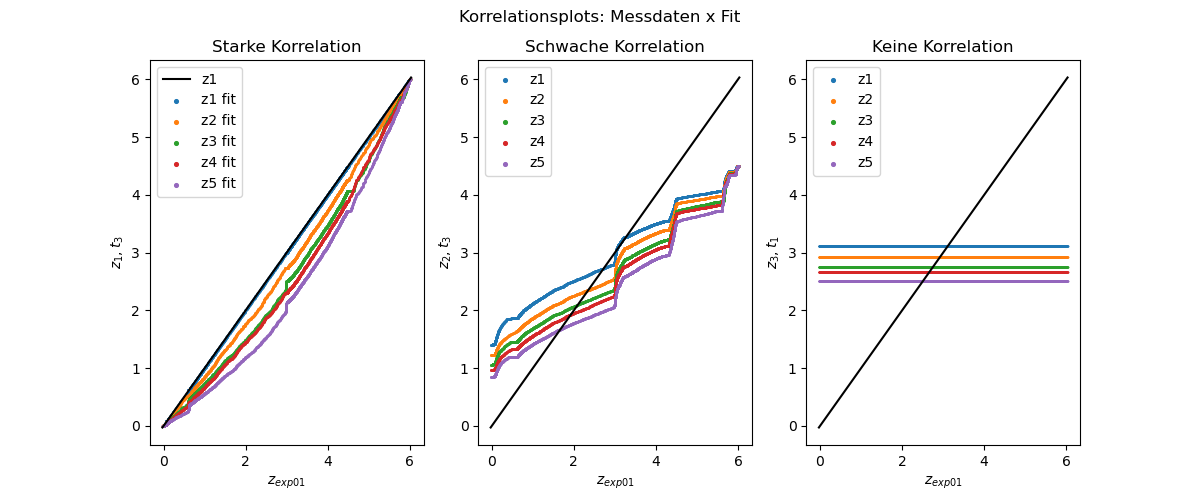

In [6]:
# prefilter data to the same length
x1, y1, z1 = (ex01[:, 0])[0:9926], (ex01[:, 1])[0:9926], (ex01[:, 2])[0:9926]
x2, y2, z2 = (ex02[:, 0])[0:9926], (ex02[:, 1])[0:9926], (ex02[:, 2])[0:9926]
x3, y3, z3 = (ex03[:, 0])[0:9926], (ex03[:, 1])[0:9926], (ex03[:, 2])[0:9926]
x4, y4, z4 = (ex04[:, 0])[0:9926], (ex04[:, 1])[0:9926], (ex04[:, 2])[0:9926]
x5, y5, z5 = (ex05[:, 0])[0:9926], (ex05[:, 1])[0:9926], (ex05[:, 2])[0:9926]


# correlation plot z1t3
U_, t_= Su1dt, t3
gamma, N, beta, c1, c2, c3, c4, c5, err = tuple(df.loc['z1t3'])
z1_pred = z(U_(t_(x1, y1), beta, c1), N, gamma)
z2_pred = z(U_(t_(x2, y2), beta, c2), N, gamma)
z3_pred = z(U_(t_(x3, y3), beta, c3), N, gamma)
z4_pred = z(U_(t_(x4, y4), beta, c4), N, gamma)
z5_pred = z(U_(t_(x5, y5), beta, c5), N, gamma)

fig, ax = plt.subplots(1,3, figsize=(12,5))
fig.suptitle("Korrelationsplots: Messdaten x Fit")

ax[0].set_title('Starke Korrelation')
ax[0].plot([min(z1), max(z1)], [min(z1), max(z1)], color='black', label='z1')
ax[0].scatter(np.sort(z1), np.sort(z1_pred), s=0.2, label='z1 fit')
ax[0].scatter(np.sort(z1), np.sort(z2_pred), s=0.2, label='z2 fit')
ax[0].scatter(np.sort(z1), np.sort(z3_pred), s=0.2, label='z3 fit')
ax[0].scatter(np.sort(z1), np.sort(z4_pred), s=0.2, label='z4 fit')
ax[0].scatter(np.sort(z1), np.sort(z5_pred), s=0.2, label='z5 fit')
ax[0].set_xlabel(r'$z_{{exp01}}$')
ax[0].set_ylabel(r'$z_1,t_3$')
ax[0].legend(markerscale=6)

# correlation plot z2t3
U_, t_= Su2dt, t3
gamma, N, beta, c1, c2, c3, c4, c5, err = tuple(df.loc['z2t3'])
z1_pred = z(U_(t_(x1, y1), beta, c1), N, gamma)
z2_pred = z(U_(t_(x2, y2), beta, c2), N, gamma)
z3_pred = z(U_(t_(x3, y3), beta, c3), N, gamma)
z4_pred = z(U_(t_(x4, y4), beta, c4), N, gamma)
z5_pred = z(U_(t_(x5, y5), beta, c5), N, gamma)

ax[1].set_title('Schwache Korrelation')
ax[1].plot([min(z1), max(z1)], [min(z1), max(z1)], color='black')
ax[1].scatter(np.sort(z1), np.sort(z1_pred), s=0.2, label='z1')
ax[1].scatter(np.sort(z1), np.sort(z2_pred), s=0.2, label='z2')
ax[1].scatter(np.sort(z1), np.sort(z3_pred), s=0.2, label='z3')
ax[1].scatter(np.sort(z1), np.sort(z4_pred), s=0.2, label='z4')
ax[1].scatter(np.sort(z1), np.sort(z5_pred), s=0.2, label='z5')
ax[1].set_xlabel(r'$z_{{exp01}}$')
ax[1].set_ylabel(r'$z_2,t_3$')
ax[1].legend(markerscale=6)

# correlation plot z3t1
U_, t_= Su3dt, t1
gamma, N, beta, c1, c2, c3, c4, c5, err = tuple(df.loc['z3t1'])
z1_pred = z(U_(t_(x1, y1), beta, c1), N, gamma)
z2_pred = z(U_(t_(x2, y2), beta, c2), N, gamma)
z3_pred = z(U_(t_(x3, y3), beta, c3), N, gamma)
z4_pred = z(U_(t_(x4, y4), beta, c4), N, gamma)
z5_pred = z(U_(t_(x5, y5), beta, c5), N, gamma)

ax[2].set_title('Keine Korrelation')
ax[2].plot([min(z1), max(z1)], [min(z1), max(z1)], color='black')
ax[2].scatter(np.sort(z1), np.sort(z1_pred), s=0.2, label='z1')
ax[2].scatter(np.sort(z1), np.sort(z2_pred), s=0.2, label='z2')
ax[2].scatter(np.sort(z1), np.sort(z3_pred), s=0.2, label='z3')
ax[2].scatter(np.sort(z1), np.sort(z4_pred), s=0.2, label='z4')
ax[2].scatter(np.sort(z1), np.sort(z5_pred), s=0.2, label='z5')
ax[2].set_xlabel(r'$z_{{exp01}}$')
ax[2].set_ylabel(fr'$z_3,t_1}}$')
ax[2].legend(markerscale=6)

plt.show()


### 1.3 Simulation und Vorhersage

#### Sensitivitätsanalyse der Parameter

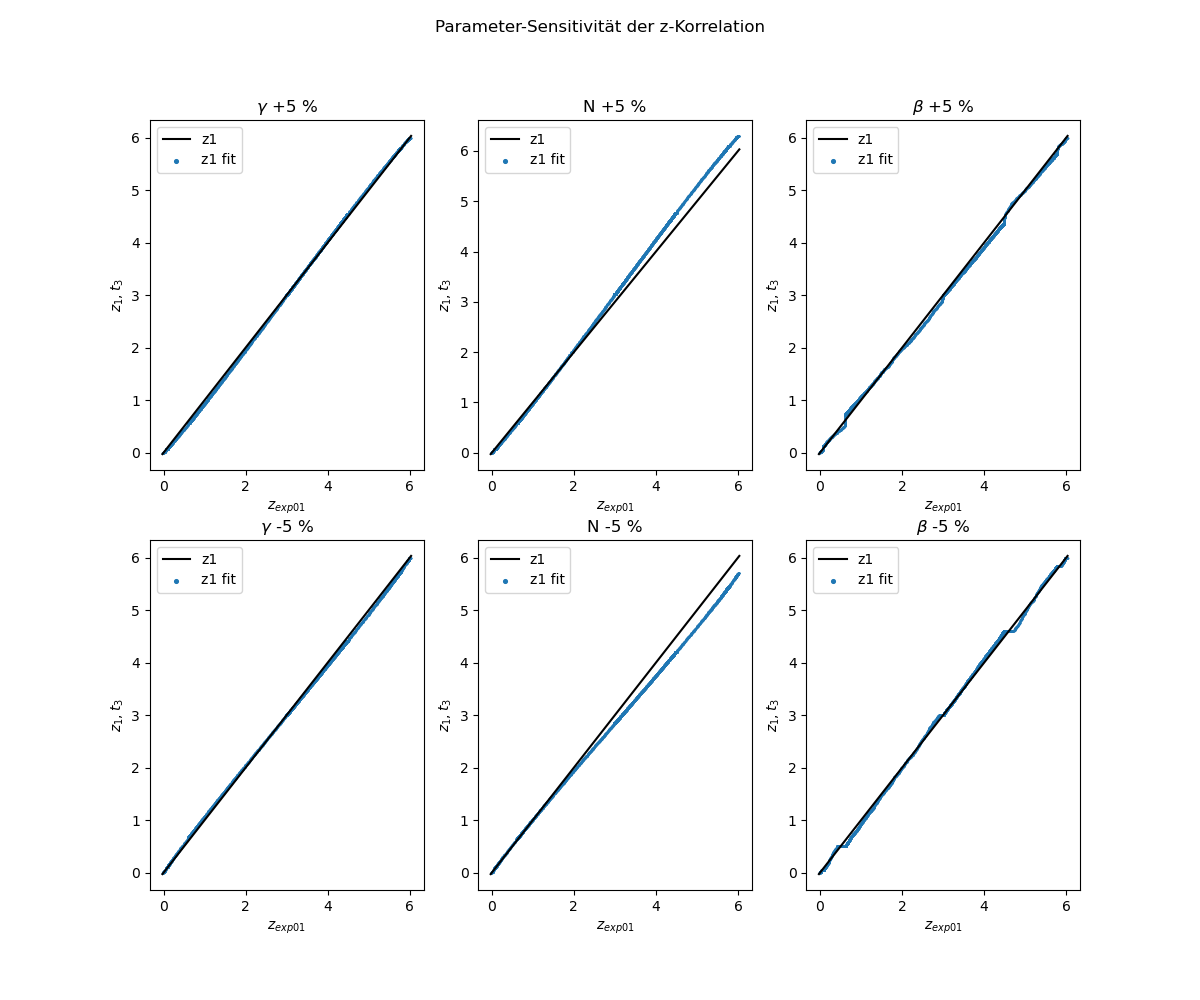

In [13]:
U_, t_= Su1dt, t3
perturbations = [1.05, 1.05, 1.05, 0.95, 0.95, 0.95]
titles = [r'$\gamma$', 'N', r'$\beta$']

fig = plt.figure(figsize=(12, 10))

for i in range(6):
    params = df.loc['z1t3'].to_numpy().copy()
    params[i%3] = params[i%3] * perturbations[i]
    gamma, N, beta, c1, c2, c3, c4, c5, err = tuple(params)
    z1_pred = z(U_(t_(x1, y1), beta, c1), N, gamma)
    
    ax = fig.add_subplot(2,3,i+1)
    fig.suptitle("Parameter-Sensitivität der z-Korrelation")
    ax.set_title(titles[i%3] + (" +" if perturbations[i]>1 else " -") + "5 %")
    ax.plot([min(z1), max(z1)], [min(z1), max(z1)], color='black', label='z1')
    ax.scatter(np.sort(z1), np.sort(z1_pred), s=0.2, label='z1 fit')

    ax.set_xlabel(r'$z_{{exp01}}$')
    ax.set_ylabel(r'$z_1,t_3$')
    ax.legend(markerscale=6)
    
plt.show()